# Estimating the fitness benefit of informative cues in complex environments

In this notebook we provide an R tutorial to apply an information theoretic approach to empirical studies from 
literature. For this, one use the package "optimx".

In [25]:
install.packages("optimx")

Installing package into ‘/home/fabrizio/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [1]:
library(optimx)

We start by defining useful functions for our estimates:

**G_fx**: function to calculate the log growth rate of a bet-hedging strategy adopting a set of phenotypes with probabilities given in the vector *pr_ph* to respond to a set of environments occurring with probabilities given in the vector *pr_e*. The payoff matrix *A* describes the fitness of an individual for each combination phenotype(rows)-environment(columns).

**GC_fx**: function to calculate the log growth rate of a strategy when the environemtal cues are known, given a set of environments occurring with probabilities given in the vector *pr_e* and a payoff matrix *A*.

**find_optimal_pr.ph**: function to estimate optimal bet-hedging strategy by maximizing the geometric fitness. Arguments are a set of environments occurring with probabilities given in the vector *pr_e* and a payoff matrix *A*.

**delta_GC_fx**: wrapper function that returns the fitness benefit of informative cue G(E|C)-G(E), G(E) and the optimal bet-hedging strategy. Arguments are the same as GC_fx.

In [2]:
G_fx<-function(pr.ph,pr.e,A) {
    #pr_ph: probabilities phenotypes
    #pr_e: probabilities environment
    #A: payoff matrix with phenotypes as rows and environments as cols
sum(sapply(1:length(pr.e), function(ie) pr.e[ie]*log(sum(sapply(1:length(pr.ph), function(iph) pr.ph[iph]*A[iph,ie])))))
}
                        
GC_fx<-function(pr.e,A) {
    #pr_e: probabilities environment
    #A: payoff matrix with phenotypes as rows and environments as cols
best_phenotypes<-sapply(1:ncol(A),function(z) which.max(A[,z]))
sum(sapply(1:length(pr.e), function(ie) pr.e[ie]*log(A[best_phenotypes[ie],ie])))
}

find_optimal_pr.ph<-function(pr.e,A){
    opt_G_fx<-function(x_pr.ph){ 
        #G+penalty for optimization when probabilities of phenotypes are <0 or >1
        G_fx(x_pr.ph,pr.e,A)+sum((-sum(x_pr.ph)+1)[sum(x_pr.ph)>1],sum(x_pr.ph)[sum(x_pr.ph)<0]) }
    x_pr.ph<-rep(1/nrow(A),nrow(A)) #set initial conditions
    myoptim<-optimx(x_pr.ph,fn=opt_G_fx,control=list(maximize=TRUE,trace=0,maxit=100,kkt=FALSE),hessian=FALSE,method=c("L-BFGS-B"),lower=0,upper=1)
    unlist(myoptim[1:length(x_pr.ph)]/sum(myoptim[1:length(x_pr.ph)]))
    }
           
delta_GC_fx<-function(pr.e,A) 
    {
    my_bh_strategy<-find_optimal_pr.ph(pr.e,A)
    GE<-G_fx(my_bh_strategy,pr.e,A)
    res<-unlist(c(GC_fx(pr.e,A)-GE,GE,my_bh_strategy))
    return(res)
}   
    
    

In [3]:
pr.ph<-c(0.1,0.9)
pr_e<-c(0.1,0.9)
my_payoffs<-cbind(c(100,1),c(0,1))
G_fx(pr.ph,pr_e,my_payoffs)
#sapply(seq(0,1,0.01), function(x) G_fx(c(x,1-x),pr_e,my_payoffs))

[1] 0.1440518

Below we show an example to see that the optimal bet-hedging strategy is not affected by different payoffs in the proportional bet-hedging case with lethal non-optimal phenotypes, while in presence of cues the fitness changes.

In [116]:
pr_ph<-c(0.1,0.9)
pr_e<-c(0.1,0.1,0.8)
my_payoffs<-cbind(c(1,0),c(1,0),c(0,1)) 

print("probability of adopting phenotype 1")
round(find_optimal_pr.ph(pr_e,my_payoffs),3)
print("log growth rate in presence of cues")
GC_fx(pr_e,my_payoffs)

[1] "probability of adopting phenotype 1"
Maximizing -- use negfn and neggr


p1  p2 
0.2 0.8

[1] "log growth rate in presence of cues"


[1] 0

In [87]:
my_payoffs<-cbind(c(0.5,0),c(0.5,0),c(0,1))
print("probability of adopting phenotype 1")
round(find_optimal_pr.ph(pr_e,my_payoffs),3)
print("log growth rate in presence of cues")
GC_fx(pr_e,my_payoffs)

my_payoffs<-cbind(c(1,0.1),c(1,0.1),c(0.8,1)) 
print("probability of adopting phenotype 1")
round(find_optimal_pr.ph(pr_e,my_payoffs),3)
print("log growth rate in presence of cues")
GC_fx(pr_e,my_payoffs)

[1] "probability of adopting phenotype 1"
Maximizing -- use negfn and neggr


p1  p2 
0.2 0.8

[1] "log growth rate in presence of cues"


[1] -0.1386294

[1] "probability of adopting phenotype 1"
Maximizing -- use negfn and neggr


p1    p2 
0.911 0.089

[1] "log growth rate in presence of cues"


[1] 0

# Floods and desert plants 
### (Examples from Mafessoni, Lachmann and Gokhale, 2020)

## Symmetric case: two environmental states with two phenotypes

In [143]:
my_payoffs<-cbind(c(5,2),c(1,2))
range_pr.pe<-c(0.001,seq(0.05,1,0.05))
deltaG<-sapply(range_pr.pe,function(x) delta_GC_fx(c(x,1-x),my_payoffs))                     

Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr


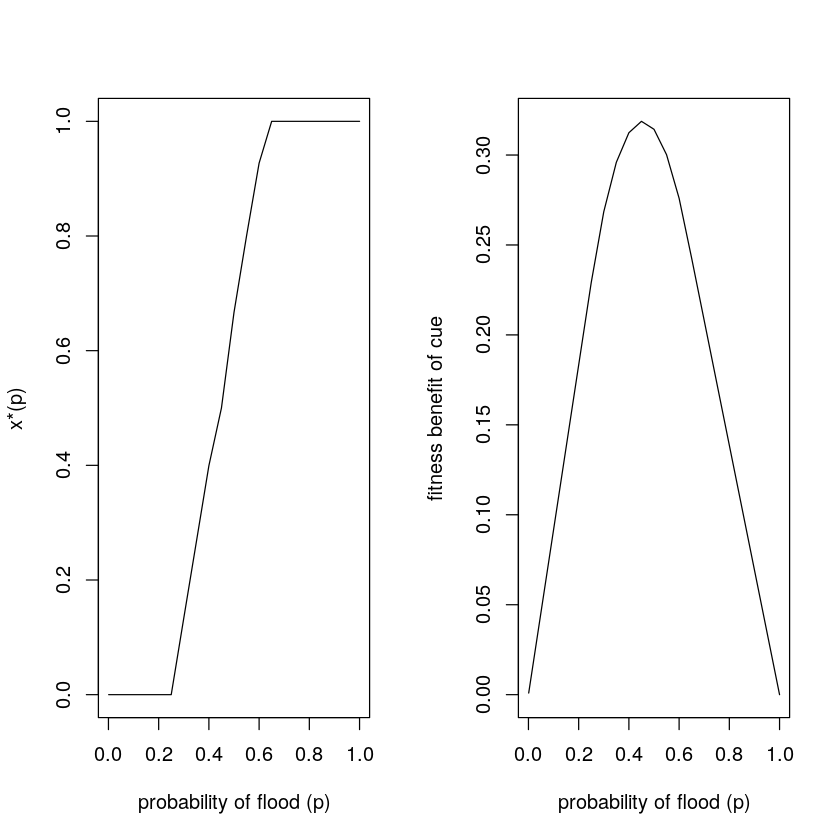

In [144]:
par(mfrow=c(1,2))
plot(range_pr.pe,deltaG[3,],xlim=c(0,1),ylim=c(0,1),type="l",xlab="probability of flood (p)",ylab="x*(p)")
plot(range_pr.pe,deltaG[1,],xlim=c(0,1),type="l",xlab="probability of flood (p)",ylab="fitness benefit of cue")

#sapply(best_bh_strategy,function delta_GC_fx(pr.ph,pr.e,A)
#plot(range_pr.pe,max(),type="l",xlab="probability of flood (p)",ylab="x*(p)")

## Asymmetric payoff matrices (3 environments and two phenotypes)

We examined in the paper a classical example of plants exposed to the risk of floods. It is convenient to for them to germinate after a flood, however if a second flood occurs straight after it might wash them away or kill them. In this case we can represent our system along a single probability (p - the risk of floods).

### Adaptation to intermediates: 

In [151]:
my_payoffs<-cbind(c(1,2),c(4,2),c(1,2))
range_pr.pe<-c(0.001,seq(0.05,1,0.05))
deltaG<-sapply(range_pr.pe,function(x) delta_GC_fx(c(x^2,2*x*(1-x),(1-x)^2),my_payoffs))   

Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr


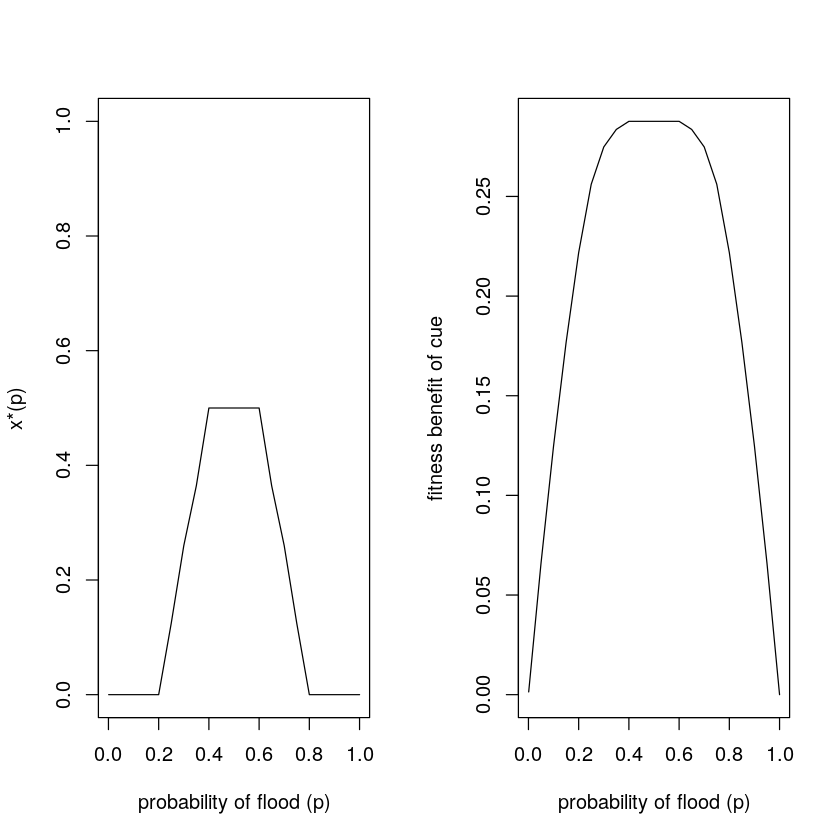

In [152]:
par(mfrow=c(1,2))
plot(range_pr.pe,deltaG[3,],xlim=c(0,1),ylim=c(0,1),type="l",xlab="probability of flood (p)",ylab="x*(p)")
plot(range_pr.pe,deltaG[1,],xlim=c(0,1),type="l",xlab="probability of flood (p)",ylab="fitness benefit of cue")

### Adaptation to extremes: Multiplicity of bet-hedging.

In [154]:
my_payoffs<-cbind(c(4,3),c(1,3),c(6,3))
range_pr.pe<-c(0.001,seq(0.05,1,0.05))
deltaG<-sapply(range_pr.pe,function(x) delta_GC_fx(c(x^2,2*x*(1-x),(1-x)^2),my_payoffs)) 

Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr


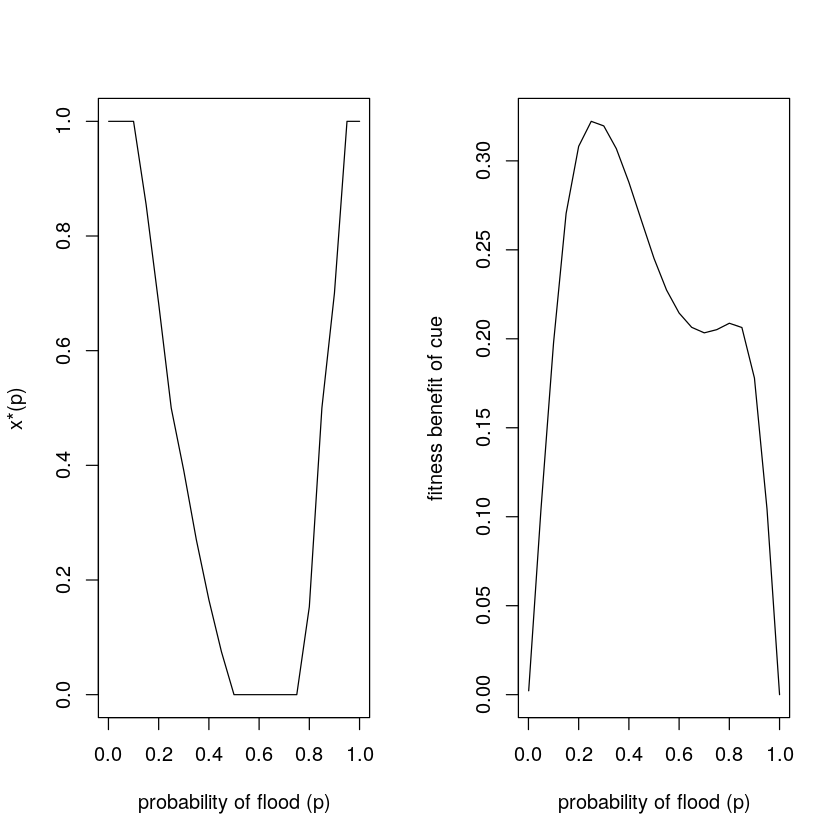

In [155]:
par(mfrow=c(1,2))
plot(range_pr.pe,deltaG[3,],xlim=c(0,1),ylim=c(0,1),type="l",xlab="probability of flood (p)",ylab="x*(p)")
plot(range_pr.pe,deltaG[1,],xlim=c(0,1),type="l",xlab="probability of flood (p)",ylab="fitness benefit of cue")

# An example with 4 environments and 2 phenotypes: drought and competition with other species in pioneer plants

In previous examples we represented our environments as a function of the frequency of one variable (p - the risk of floods) for simplicity. However, we showed in the section "Extension to finite populations" of Mafessoni, Lachmann and Gokhale that this is only a possible way to explore combinations of different environmental states (in Figure 5 shown as a potential trajectory in the simplex of potential combinations of environmental states). 
Therefore, the probabilities of environmental states 1,2 and 3 might actually be any probability p1,p2 and p3, and the combination of environmental gradient of p1,p2 and p3 explored any ecological gradient.

Here we show an hypotetical example in which different factors affect the fitness of a species, and in turn our hypotetical species has to face more potential evironmental states. We take the example of rainforest pioneer plants. The growth of these plants is not only hindered by abiotic factors (for example water availability) but also by the presence of other plants. For this reason the seeds of these plants, uniquely among rainforest plants, break their dormancy in response to light. We now want to calculate the fitness benefit of informative cues (light and water) for the germination of an hypothetical rainforest pioneer plant. We assume that a seed of our pioneer plant might end up under the canopy (with probability p_canopy) or in a clear patch of forest (the latter being favorable), and that could have sufficient water (with probability p_wet) or not (p_arid=1-p_wet). Therefore we can have four possible environmental states (wet-canopy, wet-clear, arid-canopy, arid-clear) with probabilities p_wet x (1-p_canopy), p_wet x (1-p_canopy), (1-p_wet) x p_canopy and (1-p_wet) x p_canopy, respectively.


In [29]:
my_payoffs<-cbind(c(1,2),c(10,2),c(2.1,2),c(1,2))
range_pr.pe<-c(0.01,seq(0.1,1,0.1))
x_range<-expand.grid(range_pr.pe,range_pr.pe)
xx_range<-cbind(x_range[,1]*x_range[,2],x_range[,1]*(1-x_range[,2]),(1-x_range[,1])*x_range[,2],(1-x_range[,1])*(1-x_range[,2]))
deltaG<-sapply(1:nrow(xx_range),function(x) delta_GC_fx(xx_range[x,],my_payoffs)) 

Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- use negfn and neggr
Maximizing -- 

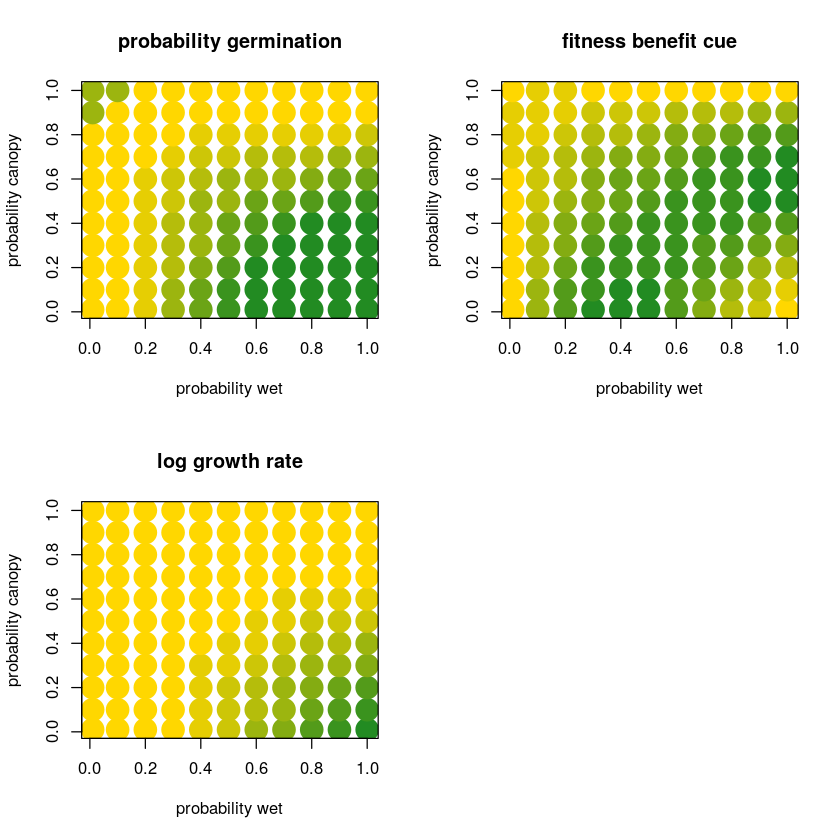

In [35]:
par(mfrow=c(2,2))
rbPal <- colorRampPalette(c('gold1','forestgreen'))
xcols <- rbPal(10)[as.numeric(cut(deltaG[3,],breaks = 10))]
plot(xx_range[,1]+xx_range[,2],xx_range[,1]+xx_range[,3],col=xcols,pch=19,cex=3,xlab="probability wet",ylab="probability canopy",main="probability germination")
xcols <- rbPal(10)[as.numeric(cut(deltaG[1,],breaks = 10))]
plot(xx_range[,1]+xx_range[,2],xx_range[,1]+xx_range[,3],col=xcols,pch=19,cex=3,xlab="probability wet",ylab="probability canopy",main="fitness benefit cue")
xcols <- rbPal(10)[as.numeric(cut(deltaG[2,],breaks = 10))]
plot(xx_range[,1]+xx_range[,2],xx_range[,1]+xx_range[,3],col=xcols,pch=19,cex=3,xlab="probability wet",ylab="probability canopy",main="log growth rate")

We can see that without cues plants would evolve to always germinate in clear areas, and hedge their bets in intermediate regions of aridity and canopy cover. For rainforest (high probability wet) the fitness benefit of a cue along the y axis reaches a peak for intermediate values. This indicates that plants adapted to light and wet conditions would have the highest fitness benefit in perceiving a cue about the canopy state (for example light) for intermediate covers of canopy. A possible biological prediction is that plants whose seeds respond to light to interrupt dormancy are unlikely to evolve in forest that show very few clear patches or that are very sparse. Conversely, we see that along the x-axis (probability of wet), for small values of canopy covers (plants that live in open areas), the fitness benefit of a cue is maximum for intermediate values of wetness-aridity. 

## The fitness value of perceiving lunar emergence and tides in hypotetical intertidal organisms

The reproductive behaviour of many marine organisms living in intertidal environments is strongly influenced by tidal patterns. A correct timing for the emergence of the adult individuals of these species is critical in natural populations, since high tide can wash away the individuals, preventing their reproduction. 
For example, a favorable time for reproduction of the marine midge Clunio marinus (Chironomidae, Diptera) 
occurs only for about 4 hours in a lunar cycle. *Clunio* individual rely on a complex a circalunar clock to obtain cues on when to emerge. Here we sketch an hypothetical estimate of the theoretical fitness advantage of the complex adaptative mechanism of similar organisms. *We stress the fact that **these calculations are purely hypothetical**, as currently not enough data are available to correctly estimate the fitness consequences of different scenarios for any of these species.* We denote our hypotethical species as *species1*.

In absence of any cues, *species1* individuals could hedge their bets for the time of emergence. Since an individual cannot reproduce if the tide is high, we assume payoff 0 in that case. 

We can represent our system in terms of two different environemtal states (low tide or high tide), with their frequency of matching the correct environment

frequency of conditions apt for reproduction ~ 4/(28*24) ~ 6%

In absence of cues:

In [36]:
prob_nocturnal.lowtide<-4/(28*24);prob_nocturnal.lowtide
number.offspring.nocturnal.lowtide<-1000
my_payoffs<-cbind(c(number.offspring.nocturnal.lowtide,1),c(0,1))

pr_e<-c(prob_nocturnal.lowtide,1-prob_nocturnal.lowtide)
fitnesses<-sapply(seq(0,1,0.0001), function(x) G_fx(c(x,1-x),pr_e,my_payoffs))
                  
pr_ph<-seq(0,1,0.0001)[which.max(fitnesses)] 
print(paste0("probability of emergence/hour in absence of cues: ",pr_ph))
print(paste0("log growth ratein absence of cues: ",G_fx(c(pr_ph,1-pr_ph),pr_e,my_payoffs)))


[1] 0.005952381

[1] "probability of emergence/hour in absence of cues: 0.005"
[1] "log growth ratein absence of cues: 0.00567756728540227"


When informative cues are used instead the log growth rate is:

In [136]:
GC_fx(pr_e,my_payoffs)

[1] 0.04111759

Hence, the fitness value of the complex adaptative strategy of *Clunio* is (in terms of bits):

G(E|C)-G(E)=

In [137]:
GC_fx(pr_e,my_payoffs)-G_fx(c(pr_ph,1-pr_ph),pr_e,my_payoffs)

[1] 0.03544002

Notice that here we made some assumptions about the life cycle of Clunio. For example we assumed that each successfull reproduction event might lead to 1000 larvae. How does the fitness benefit depend on the number of larvae?

In [41]:
species1_fx<-function(prob_nocturnal.lowtide,number.offspring.nocturnal.lowtide){
    my_payoffs<-cbind(c(number.offspring.nocturnal.lowtide,1),c(0,1))

    pr_e<-c(prob_nocturnal.lowtide,1-prob_nocturnal.lowtide)
    fitnesses<-sapply(seq(0,1,0.0001), function(x) G_fx(c(x,1-x),pr_e,my_payoffs))
                  
    pr_ph<-seq(0,1,0.0001)[which.max(fitnesses)]
    res<-c(
    pr_e[1],
    G_fx(c(pr_ph,1-pr_ph),pr_e,my_payoffs),
    GC_fx(pr_e,my_payoffs)-G_fx(c(pr_ph,1-pr_ph),pr_e,my_payoffs))
    names(res)<-c("pr_e","log_g_nocues","fitness_value_cue")
    res
}

#species1_fx(prob_nocturnal.lowtide,number.offspring.nocturnal.lowtide)
x_range<-c(10,seq(200,5000,200))
species1.number.offspring<-sapply(x_range, function(x) species1_fx(prob_nocturnal.lowtide,x))


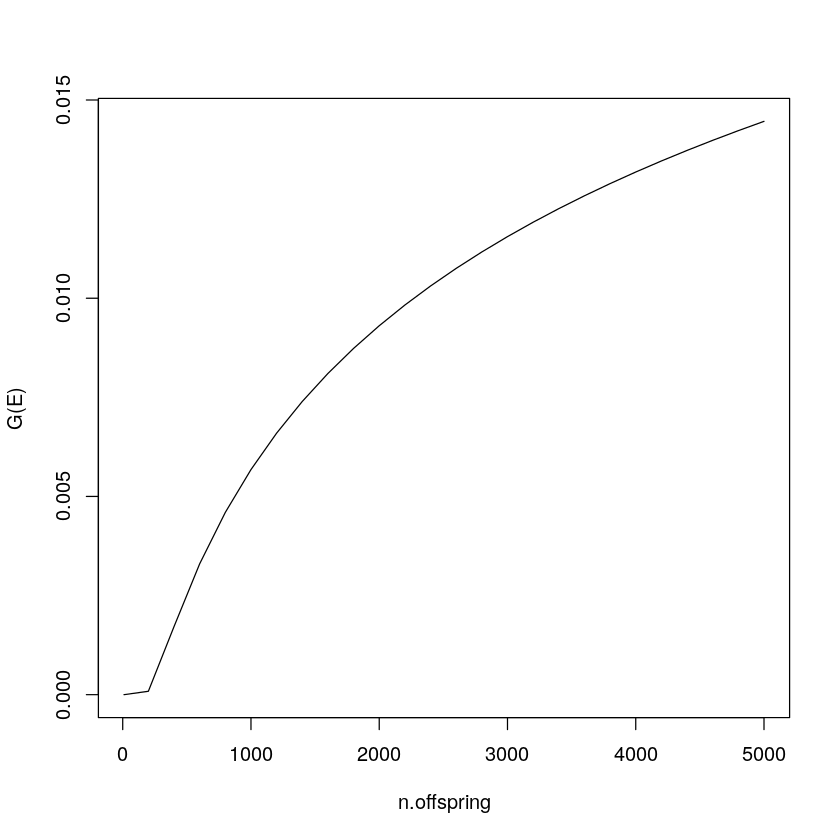

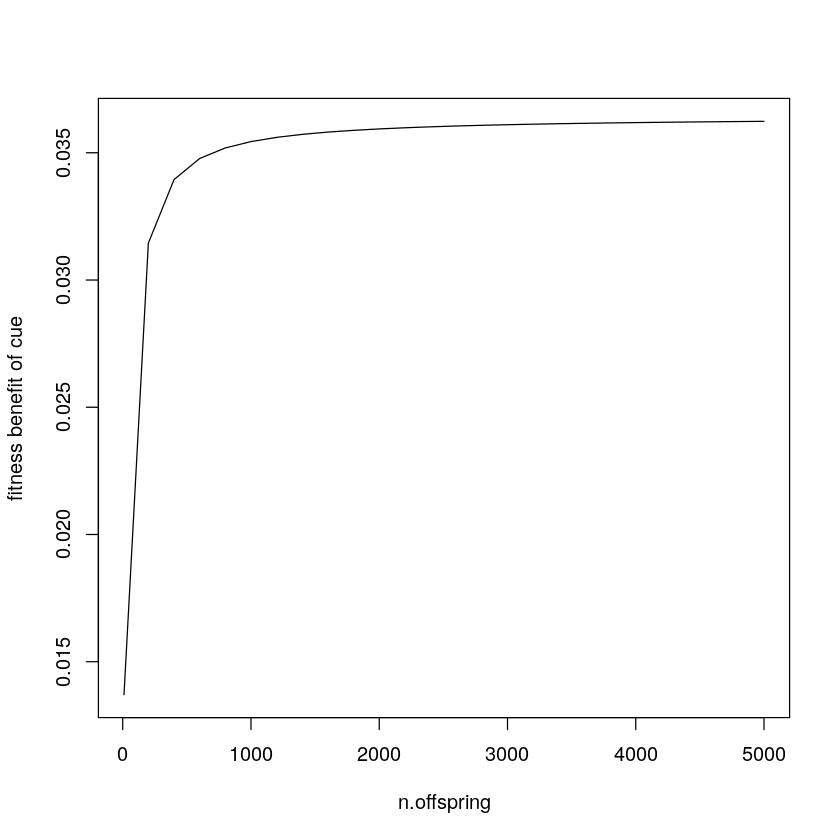

In [42]:
plot(x_range,species1.number.offspring[2,],type="l",xlab="n.offspring",ylab="G(E)")
plot(x_range,species1.number.offspring[3,],type="l",xlab="n.offspring",ylab="fitness benefit of cue")

We can also explore the effect of different proportion of favorable tide-light conditions for reproduction.

In [43]:
species1.prob_nocturnal.lowtide<-sapply(seq(0.01,1,0.01), function(x) species1_fx(x,1000))

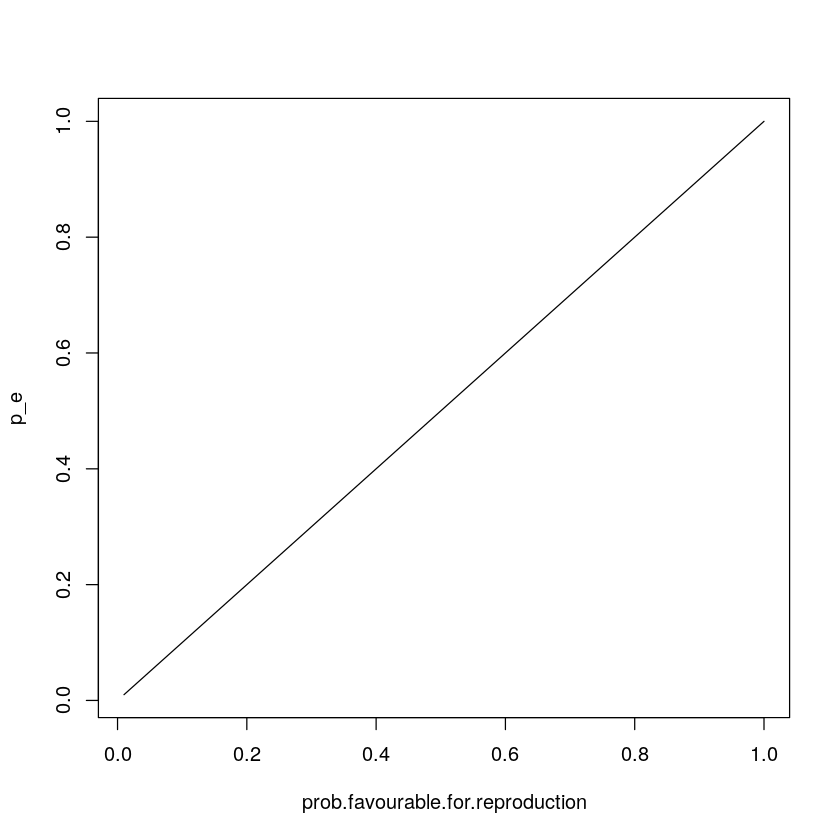

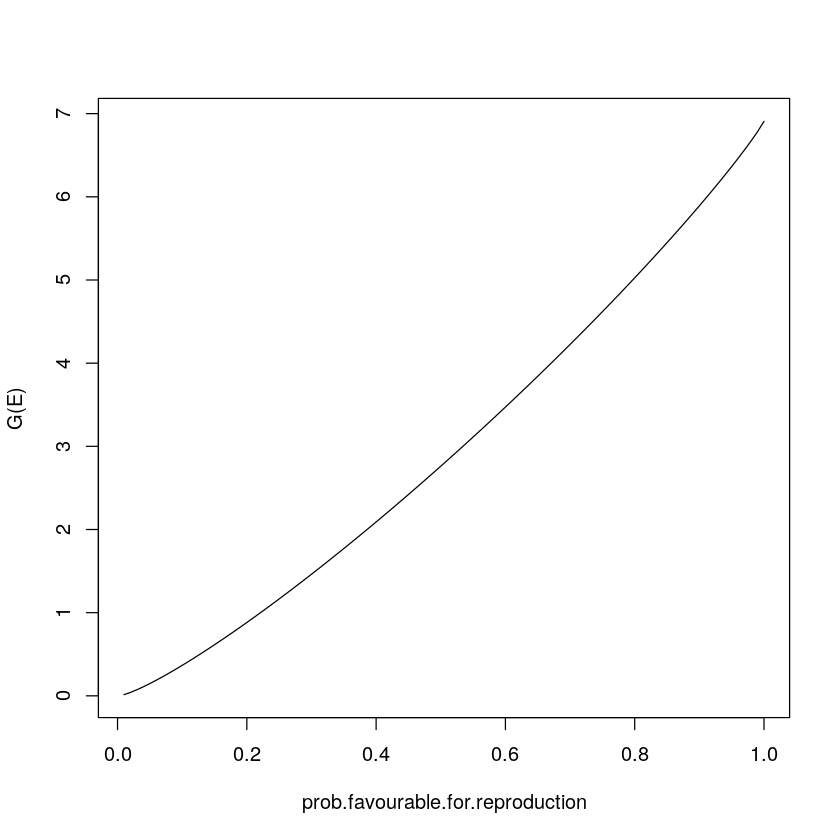

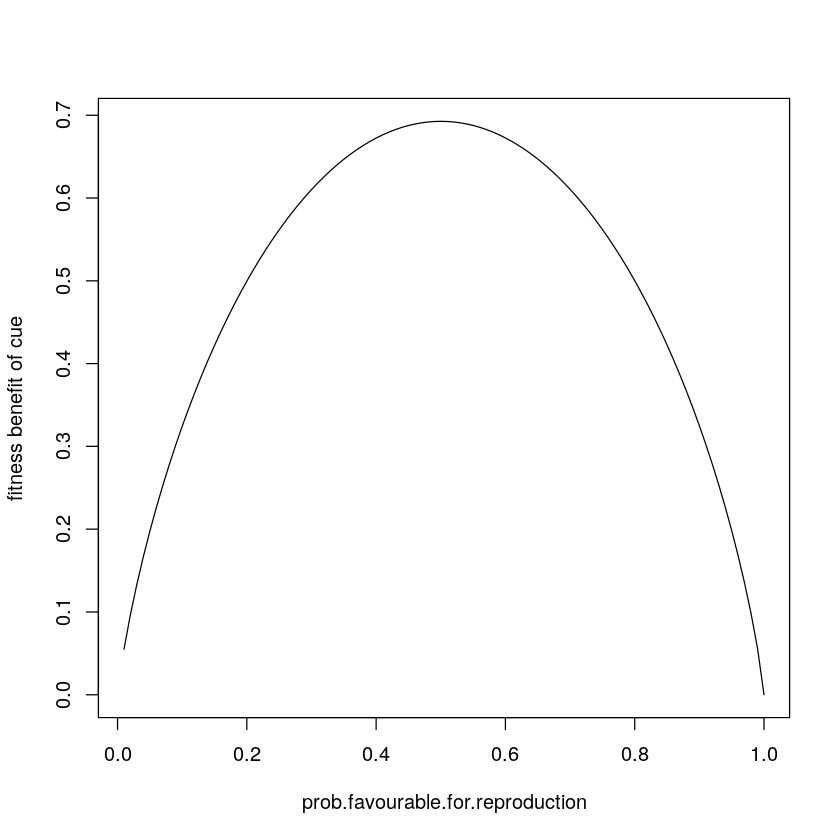

In [44]:
plot(seq(0.01,1,0.01),species1.prob_nocturnal.lowtide[1,],type="l",xlab="prob.favourable.for.reproduction",ylab="p_e")
plot(seq(0.01,1,0.01),species1.prob_nocturnal.lowtide[2,],type="l",xlab="prob.favourable.for.reproduction",ylab="G(E)")
plot(seq(0.01,1,0.01),species1.prob_nocturnal.lowtide[3,],type="l",xlab="prob.favourable.for.reproduction",ylab="fitness benefit of cue")

## References: 

*Ecophysiology of Seed Germination in the Tropical Humid Forests of the World: A Review*. Vazquez-Yanes C., Orozco Segovia A. (1984)  In: Medina E., Mooney H.A., Vázquez-Yánes C. (eds) Physiological ecology of plants of the wet tropics. Tasks for vegetation Science, vol 12. Springer, Dordrecht

*Timing the tides: Genetic control of diurnal and lunar emergence times is correlated in the marine midge Clunio marinus*, Tobias S Kaiser, Dietrich Neumann and David G Heckel, BMC Genetics 2011, 12:49
